In [206]:
import pandas as pd
from datasets import load_from_disk
from tqdm import tqdm
import numpy as np
import sys
import os
import librosa
from tqdm import tqdm
import io
tqdm.pandas()
sys.path.append('/Users/markjos/projects/malachor5/scripts')
from asr_dataset import clip_segment, validate_clipfile

In [207]:
split_ds_path='/Users/markjos/projects/malachor5/data/pyarrow-datasets/tira-clean-split'

In [208]:
ds=load_from_disk(split_ds_path)
ds

DatasetDict({
    train: Dataset({
        features: ['audio', 'start', 'end', 'transcription', 'eaf_source', 'wav_source', 'raw_transcription', 'clip', 'wav_rawpath', 'path', 'allosaurus', 'clap_ipa_cos_sim', 'wada_snr', 'nist_stnr', 'speaker-diarization-3.1', 'voice-activity-detection', 'whisper-large-v3', 'clapipa-transcription-allosaurus', 'vad_s', 'drz_s', 'trans_len', 'pcnt_speech', 'trans_len_sq', 'trans_len_log', 'cos_sim_softmax', 'cos_sim_log', 'duration'],
        num_rows: 16384
    })
    validation: Dataset({
        features: ['audio', 'start', 'end', 'transcription', 'eaf_source', 'wav_source', 'raw_transcription', 'clip', 'wav_rawpath', 'path', 'allosaurus', 'clap_ipa_cos_sim', 'wada_snr', 'nist_stnr', 'speaker-diarization-3.1', 'voice-activity-detection', 'whisper-large-v3', 'clapipa-transcription-allosaurus', 'vad_s', 'drz_s', 'trans_len', 'pcnt_speech', 'trans_len_sq', 'trans_len_log', 'cos_sim_softmax', 'cos_sim_log', 'duration'],
        num_rows: 2048
    })
    

In [209]:
# df=pd.DataFrame(columns=ds['train'].column_names+['split'])
split_dfs=[]
for split in ds:
    split_df=ds[split].remove_columns('audio').to_pandas()
    split_df['split']=split
    split_dfs.append(split_df)
df=pd.concat(split_dfs, ignore_index=True)
print(df.shape)
df.head()

(20480, 27)


,start,end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,vad_s,drz_s,trans_len,pcnt_speech,trans_len_sq,trans_len_log,cos_sim_softmax,cos_sim_log,duration,split
0,217011.0,219552.0,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s37ms011-m03s39ms552.wav,a e i a d i ɡ a m a l a,...,2.379,2.447,23,0.936246,3.135494,3.135494,0.000044,-10.039731,2.541,train
1,221371.0,225023.0,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s41ms371-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s41ms371-m03s45ms023.wav,a j a d i v a n a l a,...,3.375,3.510,23,0.924151,3.135494,3.135494,0.000044,-10.028157,3.652,train
2,283401.0,286528.0,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s43ms401-m04s46ms528.wav,a p e i e p e l e ð a l a m a l a,...,3.088,3.037,29,0.987528,3.367296,3.367296,0.000042,-10.080580,3.127,train
3,288835.0,291580.0,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s48ms835-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s48ms835-m04s51ms580.wav,a t e i j a p e d e ð a ɡ a n a ð a,...,2.413,2.649,29,0.879053,3.367296,3.367296,0.000044,-10.025673,2.745,train
4,304737.0,307762.0,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m05s04ms737-m05...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m05s04ms737-m05s07ms762.wav,a e j e ð e d e ð a l a m a l a,...,2.920,2.919,29,0.965289,3.367296,3.367296,0.000042,-10.068530,3.025,train


In [211]:
train_len=df[df['split']=='train'].shape[0]
train_hours=df.loc[df['split']=='train', 'duration'].sum()/3_600
print(f"Train records: {train_len}\t\ttrain hours {train_hours}")

validation_len=df[df['split']=='validation'].shape[0]
validation_hours=df.loc[df['split']=='validation', 'duration'].sum()/3_600
print(f"Validation records: {validation_len}\tvalidation hours {validation_hours}")

test_len=df[df['split']=='test'].shape[0]
test_hours=df.loc[df['split']=='test', 'duration'].sum()/3_600
print(f"Test records: {test_len}\t\ttest hours {test_hours}")


Train records: 16384		train hours 9.475035277777778
Validation records: 2048	validation hours 1.126686388888889
Test records: 2048		test hours 0.6514258333333333


In [6]:
df.loc[0]

start                                                                        217011.0
end                                                                          219552.0
transcription                                                 àprí jɜ̀dí ðáŋàlà
eaf_source                          /Users/markjos/Library/CloudStorage/GoogleDriv...
wav_source                          /Users/markjos/Library/CloudStorage/GoogleDriv...
raw_transcription                                             àprí jɜ̀dí ðáŋàlà
clip                                data/tira-asr/clips/HH01082021-m03s37ms011-m03...
wav_rawpath                         /Users/markjos/Library/CloudStorage/GoogleDriv...
path                                           HH01082021-m03s37ms011-m03s39ms552.wav
allosaurus                                                    a e i a d i ɡ a m a l a
clap_ipa_cos_sim                                                             0.705214
wada_snr                                              

There are 45 ungrammatical sentences in the dataset. Whoops.

In [7]:
df['raw_transcription'].str.contains('\*').value_counts()

raw_transcription
False    20435
True        45
Name: count, dtype: int64

The train split contains 21 recordings not found in test or validation. Neither test nor validation partitions have any recordings only found in them, but they each have 1 recording not found in train.

In [8]:
train=df['split']=='train'
validation=df['split']=='validation'
test=df['split']=='test'

train_wavs=pd.Series(df[train]['wav_source'].unique())
val_wavs=pd.Series(df[validation]['wav_source'].unique())
test_wavs=pd.Series(df[test]['wav_source'].unique())

df['split']
train_only = train_wavs[~train_wavs.isin(val_wavs) & ~train_wavs.isin(test_wavs)]
val_only = val_wavs[~val_wavs.isin(train_wavs)]# & ~val_wavs.isin(test_wavs)]
test_only = test_wavs[~test_wavs.isin(train_wavs)]# & ~test_wavs.isin(val_wavs)]

train_only.shape, val_only.shape, test_only.shape

((21,), (1,), (1,))

Let's add 30s before and after each record and see how many overlaps we create.

In [9]:
# remaining=((30-df['duration'])*1_000).astype(int)
df['long_start']=df['start']-30_000
df['long_end']=df['end']+30_000
df[['long_start', 'long_end']]

,long_start,long_end
0,187011.0,249552.0
1,191371.0,255023.0
2,253401.0,316528.0
3,258835.0,321580.0
4,274737.0,337762.0
...,...,...
20475,554799.0,615373.0
20476,1964053.0,2024599.0
20477,1402547.0,1463467.0
20478,1587160.0,1647733.0


In [10]:
def find_overlap(row):
    start=row['long_start']
    end=row['long_end']
    wav=row['wav_source']

    has_wav=df['wav_source']==wav
    after_start=df['start']>=start
    before_end=df['end']<=end
    overlap=has_wav&after_start&before_end
    return df.loc[overlap].index.tolist()
df['overlap']=df.apply(find_overlap, axis=1)
df['overlap']

0                                                   [0, 1]
1                                                   [0, 1]
2                                                [2, 3, 4]
3                                                [2, 3, 4]
4                                                [2, 3, 4]
                               ...                        
20475    [15837, 15838, 15839, 15840, 15841, 15842, 158...
20476                                [15913, 15914, 20476]
20477    [16018, 16019, 16020, 16021, 16022, 16023, 160...
20478                                [16025, 16026, 20478]
20479                  [16366, 16367, 16368, 16369, 20479]
Name: overlap, Length: 20480, dtype: object

In [11]:
df['num_overlap']=df['overlap'].apply(len)
df['num_overlap'].mean()

6.39443359375

In [12]:
get_split_from_index = lambda ilist: [df.at[i, 'split'] for i in ilist]
df['overlap_split']=df['overlap'].apply(get_split_from_index)
df['overlap_split']

0                                           [train, train]
1                                           [train, train]
2                                    [train, train, train]
3                                    [train, train, train]
4                                    [train, train, train]
                               ...                        
20475    [train, train, train, train, train, train, tra...
20476                                 [train, train, test]
20477    [train, train, train, train, train, train, tra...
20478                                 [train, train, test]
20479                   [train, train, train, train, test]
Name: overlap_split, Length: 20480, dtype: object

In [13]:
df['overlap_split'].apply(set).value_counts()

overlap_split
{train}                      13367
{validation, train}           2322
{train, test}                 2124
{test}                         931
{validation}                   921
{validation, test}             438
{validation, train, test}      377
Name: count, dtype: int64

Let's pick a subset of records such that there is overlap between any of them.
Let's also exclude an record which has labels from multiple splits included.

In [14]:
collapsed_idcs=[]
covered_idcs=[]
for i, row in tqdm(df.iterrows(), total=len(df)):
    if len(set(row['overlap_split']))>1:
        # ignore recrods that overlap with labels from multiple partitions
        continue
    # if no labels in this record have been picked already, add to subset
    if not any(j in collapsed_idcs for j in row['overlap']):
        collapsed_idcs.append(i)
        covered_idcs.extend(row['overlap'])
df_sub=df.loc[collapsed_idcs]
df_sub.shape

100%|██████████| 20480/20480 [00:02<00:00, 9913.09it/s]


(5354, 32)

Let's update the 'start', 'end' and 'transcription' columns to have the values for each label within the interval.

In [15]:
get_values_for_overlap_span = lambda idcs, col: df.loc[idcs][col].tolist()

df_sub['start_list']=df['overlap'].apply(lambda x: get_values_for_overlap_span(x, 'start'))
df_sub['end_list']=df['overlap'].apply(lambda x: get_values_for_overlap_span(x, 'end'))
df_sub['trans_list']=df['overlap'].apply(lambda x: get_values_for_overlap_span(x, 'transcription'))

In [16]:
df_sub['trans_list']

0        [àprí jɜ̀dí ðáŋàlà, àprí jɜ̀dí ðáŋà...
2        [àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà, àprí jə̀və̀l...
5        [àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà, àprí jàvə́l...
7        [àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...
10       [àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...
                               ...                        
20439                                         [làrdɜ̀dì]
20440                                       [lɛ̀àrdɛ̀dì]
20455    [là t̪ə́rvàvɛ̀, là t̪ə́rvàvì, lìjàjɔ̀, ...
20459    [lìjàjɔ̀, là jájɛ̀, là jájɛ̀, lə̀jàrjɔ́...
20466                                   [là bŕɽàɽìðì]
Name: trans_list, Length: 5354, dtype: object

Let's load phone embeddings so we can find which records have the most diversity of Tira labels

In [17]:
import torch
from torch.nn.functional import cosine_similarity
phone_embed_path='/Users/markjos/projects/malachor5/data/pyarrow-datasets/tira-clean-split/clap_ipa_phone_embeds.pt'
embeds=torch.load(phone_embed_path)
embeds.shape

torch.Size([20480, 512])

In [18]:
cosine_similarity(embeds, embeds, dim=1).shape

torch.Size([20480])

In [19]:
embeds.mean(dim=0).shape

torch.Size([512])

<Axes: >

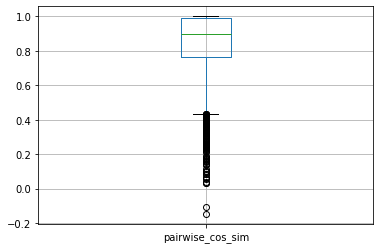

In [20]:
def pairwise_cos_sim(idcs):
    if len(idcs)==0:
        return 1
    embed_list=[]
    comparanda=[]
    for i in idcs:
        embed=embeds[i]
        other_idcs = [j for j in idcs if j!=i]
        other_embeds = embeds[other_idcs]
        embed_list.append(embed)
        comparanda.append(other_embeds.mean(dim=0))
    return cosine_similarity(torch.stack(embed_list), torch.stack(comparanda)).mean().item()

df_sub['pairwise_cos_sim']=df_sub['overlap'].apply(pairwise_cos_sim)
df_sub.boxplot('pairwise_cos_sim')

In [29]:
df_sub=df_sub.rename({
    'start':'old_start',
    'end':'old_end',
    'long_start':'start',
    'long_end':'end',
}, axis=1)
df_sub.head()

,old_start,old_end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,split,start,end,overlap,num_overlap,overlap_split,start_list,end_list,trans_list,pairwise_cos_sim
0,217011.0,219552.0,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s37ms011-m03s39ms552.wav,a e i a d i ɡ a m a l a,...,train,187011.0,249552.0,"[0, 1]",2,"[train, train]","[217011.0, 221371.0]","[219552.0, 225023.0]","[àprí jɜ̀dí ðáŋàlà, àprí jɜ̀dí ðáŋà...",0.659426
2,283401.0,286528.0,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s43ms401-m04s46ms528.wav,a p e i e p e l e ð a l a m a l a,...,train,253401.0,316528.0,"[2, 3, 4]",3,"[train, train, train]","[283401.0, 288835.0, 304737.0]","[286528.0, 291580.0, 307762.0]","[àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà, àprí jə̀və̀l...",0.270774
5,373451.0,377362.0,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,data/tira-asr/clips/HH01082021-m06s13ms451-m06...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m06s13ms451-m06s17ms362.wav,a p i j a b ɛ l ɛ j e d e b a ŋ a l a,...,train,343451.0,407362.0,"[5, 6]",2,"[train, train]","[373451.0, 378899.0]","[377362.0, 383279.0]","[àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà, àprí jàvə́l...",0.285611
7,514659.0,518038.0,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m08s34ms659-m08...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m08s34ms659-m08s38ms038.wav,a p r e ʂ i j a b ɛ l i ð ɔ r a ŋ a n a,...,train,484659.0,548038.0,"[7, 8, 9]",3,"[train, train, train]","[514659.0, 524380.0, 540389.0]","[518038.0, 527963.0, 543475.0]","[àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...",0.690790
10,564731.0,567740.0,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m09s24ms731-m09...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m09s24ms731-m09s27ms740.wav,a e a b l e ð e ð a m a ð a,...,train,534731.0,597740.0,"[9, 10, 11]",3,"[train, train, train]","[540389.0, 564731.0, 590317.0]","[543475.0, 567740.0, 593363.0]","[àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...",0.920946


In [34]:
for column in ['start', 'end', 'old_start', 'old_end']:
    df_sub[column]=df_sub[column].astype(int)
df_sub.head()

,old_start,old_end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,split,start,end,overlap,num_overlap,overlap_split,start_list,end_list,trans_list,pairwise_cos_sim
0,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s37ms011-m03s39ms552.wav,a e i a d i ɡ a m a l a,...,train,187011,249552,"[0, 1]",2,"[train, train]","[217011.0, 221371.0]","[219552.0, 225023.0]","[àprí jɜ̀dí ðáŋàlà, àprí jɜ̀dí ðáŋà...",0.659426
2,283401,286528,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s43ms401-m04s46ms528.wav,a p e i e p e l e ð a l a m a l a,...,train,253401,316528,"[2, 3, 4]",3,"[train, train, train]","[283401.0, 288835.0, 304737.0]","[286528.0, 291580.0, 307762.0]","[àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà, àprí jə̀və̀l...",0.270774
5,373451,377362,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,data/tira-asr/clips/HH01082021-m06s13ms451-m06...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m06s13ms451-m06s17ms362.wav,a p i j a b ɛ l ɛ j e d e b a ŋ a l a,...,train,343451,407362,"[5, 6]",2,"[train, train]","[373451.0, 378899.0]","[377362.0, 383279.0]","[àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà, àprí jàvə́l...",0.285611
7,514659,518038,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m08s34ms659-m08...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m08s34ms659-m08s38ms038.wav,a p r e ʂ i j a b ɛ l i ð ɔ r a ŋ a n a,...,train,484659,548038,"[7, 8, 9]",3,"[train, train, train]","[514659.0, 524380.0, 540389.0]","[518038.0, 527963.0, 543475.0]","[àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...",0.690790
10,564731,567740,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m09s24ms731-m09...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m09s24ms731-m09s27ms740.wav,a e a b l e ð e ð a m a ð a,...,train,534731,597740,"[9, 10, 11]",3,"[train, train, train]","[540389.0, 564731.0, 590317.0]","[543475.0, 567740.0, 593363.0]","[àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...",0.920946


In [104]:
codemixed_csv='../data/tira-code-mixed/metadata.csv'

In [ ]:
df_sub.to_csv(codemixed_csv, index=False)

In [105]:
df_sub=pd.read_csv(codemixed_csv)
df_sub.head()

,old_start,old_end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,split,start,end,overlap,num_overlap,overlap_split,start_list,end_list,trans_list,pairwise_cos_sim
0,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s37ms011-m03s39ms552.wav,a e i a d i ɡ a m a l a,...,train,187011,249552,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426
1,283401,286528,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s43ms401-m04s46ms528.wav,a p e i e p e l e ð a l a m a l a,...,train,253401,316528,"[2, 3, 4]",3,"['train', 'train', 'train']","[283401.0, 288835.0, 304737.0]","[286528.0, 291580.0, 307762.0]","['àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà', 'àprí jə̀v...",0.270774
2,373451,377362,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,data/tira-asr/clips/HH01082021-m06s13ms451-m06...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m06s13ms451-m06s17ms362.wav,a p i j a b ɛ l ɛ j e d e b a ŋ a l a,...,train,343451,407362,"[5, 6]",2,"['train', 'train']","[373451.0, 378899.0]","[377362.0, 383279.0]","['àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà', 'àprí jàv...",0.285611
3,514659,518038,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m08s34ms659-m08...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m08s34ms659-m08s38ms038.wav,a p r e ʂ i j a b ɛ l i ð ɔ r a ŋ a n a,...,train,484659,548038,"[7, 8, 9]",3,"['train', 'train', 'train']","[514659.0, 524380.0, 540389.0]","[518038.0, 527963.0, 543475.0]","['àprí jávə̀lɛ̀ðɔ́ ðáŋàlà', 'àprí jáv...",0.690790
4,564731,567740,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m09s24ms731-m09...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m09s24ms731-m09s27ms740.wav,a e a b l e ð e ð a m a ð a,...,train,534731,597740,"[9, 10, 11]",3,"['train', 'train', 'train']","[540389.0, 564731.0, 590317.0]","[543475.0, 567740.0, 593363.0]","['àprí jávə̀lɛ̀ðɔ́ ðáŋàlà', 'àprí jáv...",0.920946


Let's fix `metadata.csv`, it should only have non-broken records and should include the `file_name` column.

In [112]:
broken_csv='/Users/markjos/projects/malachor5/data/tira-code-mixed/metadata_w_broken.csv'
broken_df=pd.read_csv(broken_csv)
broken_df.shape

((5354, 37), (5318, 42))

In [119]:
invalid_clip_file='/Users/markjos/projects/malachor5/data/tira-code-mixed/invalid_clips.txt'
with open(invalid_clip_file) as f:
    broken_clips=[
        os.path.relpath(line.split()[0], 'data/tira-code-mixed') for line in f.readlines()
    ]
len(broken_clips), broken_clips

(36,
 ['clips/test/HH20220712-2-h-1m59s54ms175-m00s54ms955.wav',
  'clips/test/HH20210927-h-1m59s49ms620-m00s50ms190.wav',
  'clips/test/HH20211123-h-1m59s41ms140-m00s41ms750.wav',
  'clips/train/HH04092021-h-1m59s51ms980-m00s53ms620.wav',
  'clips/train/HH20211116-2-h-1m59s49ms435-m00s52ms089.wav',
  'clips/train/HH20231104-h-1m59s43ms240-m00s45ms600.wav',
  'clips/train/HH09242020-h-1m59s38ms308-m00s39ms708.wav',
  'clips/train/HH20230420-1-Zoom-h-1m59s47ms650-m00s49ms140.wav',
  'clips/train/HH20231229-h-1m59s57ms200-m00s58ms710.wav',
  'clips/train/HH20230929-h-1m59s55ms300-m00s58ms590.wav',
  'clips/train/HH20220828-h-1m59s40ms860-m00s43ms380.wav',
  'clips/train/HH20240126-h-1m59s43ms586-m00s45ms479.wav',
  'clips/train/HH20220405-h-1m59s43ms050-m00s44ms860.wav',
  'clips/train/HH20220224-h-1m59s39ms410-m00s41ms490.wav',
  'clips/train/HH09022020-h-1m59s59ms485-m01s00ms958.wav',
  'clips/train/HH20230524-1-h-1m59s53ms980-m00s57ms380.wav',
  'clips/train/HH20220111-2-h-1m59s48ms89

In [120]:
broken_df['file_name']

0       clips/train/HH01082021-m03s07ms011-m04s09ms552...
1       clips/train/HH01082021-m04s13ms401-m05s16ms528...
2       clips/train/HH01082021-m05s43ms451-m06s47ms362...
3       clips/train/HH01082021-m08s04ms659-m09s08ms038...
4       clips/train/HH01082021-m08s54ms731-m09s57ms740...
                              ...                        
5349    clips/test/HH20231104-m24s55ms175-m25s56ms855.wav
5350    clips/test/HH20231104-m25s26ms450-m26s27ms670.wav
5351    clips/test/HH20231104-m29s43ms445-m30s44ms895.wav
5352    clips/test/HH20231104-m30s17ms145-m31s18ms435.wav
5353    clips/test/HH20231104-m33s08ms935-m34s10ms845.wav
Name: file_name, Length: 5354, dtype: object

In [121]:
is_broken=broken_df['file_name'].isin(broken_clips)
is_broken.value_counts()

file_name
False    5318
True       36
Name: count, dtype: int64

In [125]:
df=broken_df[~is_broken]
df.shape

(5318, 37)

In [123]:
df.to_csv(codemixed_csv, index=False)

Now that we've got VAD timestamps from PyAnnote, let's make records into 30s long sequences of speech chunks so we can use Whisper to transcribe the individual chunks

In [75]:
vad_csv='/Users/markjos/projects/malachor5/data/tira-code-mixed/tira-code-mixed-vad.csv'
vad_df=pd.read_csv(vad_csv)
vad_df.head()

,old_start,old_end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,split,start,end,overlap,num_overlap,overlap_split,start_list,end_list,trans_list,pairwise_cos_sim
0,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s07ms011-m04s09ms552.wav,a e i a d i ɡ a m a l a,...,train,187011,249552,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426
1,283401,286528,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s13ms401-m05s16ms528.wav,a p e i e p e l e ð a l a m a l a,...,train,253401,316528,"[2, 3, 4]",3,"['train', 'train', 'train']","[283401.0, 288835.0, 304737.0]","[286528.0, 291580.0, 307762.0]","['àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà', 'àprí jə̀v...",0.270774
2,373451,377362,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,data/tira-asr/clips/HH01082021-m06s13ms451-m06...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m05s43ms451-m06s47ms362.wav,a p i j a b ɛ l ɛ j e d e b a ŋ a l a,...,train,343451,407362,"[5, 6]",2,"['train', 'train']","[373451.0, 378899.0]","[377362.0, 383279.0]","['àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà', 'àprí jàv...",0.285611
3,514659,518038,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m08s34ms659-m08...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m08s04ms659-m09s08ms038.wav,a p r e ʂ i j a b ɛ l i ð ɔ r a ŋ a n a,...,train,484659,548038,"[7, 8, 9]",3,"['train', 'train', 'train']","[514659.0, 524380.0, 540389.0]","[518038.0, 527963.0, 543475.0]","['àprí jávə̀lɛ̀ðɔ́ ðáŋàlà', 'àprí jáv...",0.690790
4,564731,567740,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m09s24ms731-m09...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m08s54ms731-m09s57ms740.wav,a e a b l e ð e ð a m a ð a,...,train,534731,597740,"[9, 10, 11]",3,"['train', 'train', 'train']","[540389.0, 564731.0, 590317.0]","[543475.0, 567740.0, 593363.0]","['àprí jávə̀lɛ̀ðɔ́ ðáŋàlà', 'àprí jáv...",0.920946


Before we continue, gotta insert the `file_name` column from the metadata.

In [132]:
merged_df=pd.merge(vad_df, df[['clip', 'file_name']], how='inner', on='clip')
merged_df.shape, vad_df.shape

((5318, 43), (5318, 42))

In [133]:
vad_df=merged_df

First, let's make the VAD and Tira timestamps into lists of tuples of floats

In [76]:
vad_df['voice-activity-detection']

0       8.182 9.464 SPEECH;11.573 12.603 SPEECH;13.548...
1       0.284 0.976 SPEECH;2.461 6.545 SPEECH;7.051 8....
2       0.031 0.706 SPEECH;4.739 5.988 SPEECH;10.240 1...
3       0.655 0.959 SPEECH;4.047 4.418 SPEECH;5.127 6....
4       5.870 8.536 SPEECH;12.653 14.948 SPEECH;16.805...
                              ...                        
5313    1.516 2.444 SPEECH;3.524 4.553 SPEECH;8.924 9....
5314    0.031 0.925 SPEECH;1.938 4.233 SPEECH;4.570 5....
5315    1.988 2.630 SPEECH;5.245 6.359 SPEECH;8.620 10...
5316    3.102 3.305 SPEECH;3.693 4.148 SPEECH;8.063 10...
5317    0.031 0.757 SPEECH;5.887 9.447 SPEECH;10.392 1...
Name: voice-activity-detection, Length: 5318, dtype: object

In [77]:
def vad_str_to_list(row):
    vad_str=row['voice-activity-detection']
    record_start=row['start']/1_000
    vad_str=vad_str.removesuffix(';')
    segments=vad_str.split(sep=';')
    start_list = [float(segment.split()[0])+record_start for segment in segments]
    end_list = [float(segment.split()[1])+record_start for segment in segments]
    mid_list = [(start+end)/2 for start, end in zip(start_list, end_list)]

    return list(zip(start_list, mid_list, end_list))
vad_df['voice-activity-detection'][0], vad_df['start'][0]/1_000, vad_str_to_list(vad_df.iloc[0])

('8.182 9.464 SPEECH;11.573 12.603 SPEECH;13.548 17.159 SPEECH;17.429 18.796 SPEECH;20.264 21.766 SPEECH;22.694 24.550 SPEECH;25.023 25.343 SPEECH;25.664 28.162 SPEECH;30.153 32.482 SPEECH;34.523 37.797 SPEECH;40.143 41.425 SPEECH;42.826 45.188 SPEECH;46.117 48.563 SPEECH;50.538 52.428 SPEECH;54.082 54.554 SPEECH;55.212 60.359 SPEECH;60.882 61.439 SPEECH;62.063 62.570 SPEECH;',
 187.011,
 [(195.19299999999998, 195.834, 196.475),
  (198.584, 199.099, 199.614),
  (200.559, 202.3645, 204.17),
  (204.44, 205.12349999999998, 205.807),
  (207.275, 208.026, 208.777),
  (209.70499999999998, 210.63299999999998, 211.561),
  (212.034, 212.194, 212.35399999999998),
  (212.675, 213.924, 215.173),
  (217.164, 218.3285, 219.493),
  (221.534, 223.171, 224.808),
  (227.154, 227.795, 228.43599999999998),
  (229.837, 231.018, 232.199),
  (233.128, 234.351, 235.574),
  (237.54899999999998, 238.49399999999997, 239.439),
  (241.093, 241.329, 241.565),
  (242.223, 244.7965, 247.37),
  (247.893, 248.171499999

In [78]:
vad_df['vad_timestamps']=vad_df.apply(vad_str_to_list, axis=1)
vad_df['vad_timestamps']

0       [(195.19299999999998, 195.834, 196.475), (198....
1       [(253.685, 254.031, 254.377), (255.86200000000...
2       [(343.482, 343.81950000000006, 344.15700000000...
3       [(485.31399999999996, 485.466, 485.618), (488....
4       [(540.601, 541.934, 543.2669999999999), (547.3...
                              ...                        
5313    [(1496.691, 1497.155, 1497.619), (1498.6989999...
5314    [(1526.481, 1526.9279999999999, 1527.375), (15...
5315    [(1785.433, 1785.754, 1786.075), (1788.6899999...
5316    [(1820.247, 1820.3485, 1820.45), (1820.838, 18...
5317    [(1988.966, 1989.329, 1989.692), (1994.822, 19...
Name: vad_timestamps, Length: 5318, dtype: object

In [79]:
def get_tira_timestamps(row):
    starts_ms = eval(row['start_list'])
    ends_ms = eval(row['end_list'])
    start_list = [start/1_000 for start in starts_ms]
    end_list = [end/1_000 for end in ends_ms]
    mid_list = [(start+end)/2 for start, end in zip(start_list, end_list)]

    return list(zip(start_list, mid_list, end_list))
tira_timestamps=vad_df.apply(get_tira_timestamps, axis=1)
vad_df['tira_timestamps']=tira_timestamps
vad_df['tira_timestamps']

0       [(217.011, 218.2815, 219.552), (221.371, 223.1...
1       [(283.401, 284.96450000000004, 286.528), (288....
2       [(373.451, 375.40650000000005, 377.362), (378....
3       [(514.659, 516.3485000000001, 518.038), (524.3...
4       [(540.389, 541.932, 543.475), (564.731, 566.23...
                              ...                        
5313           [(1525.175, 1526.0149999999999, 1526.855)]
5314                        [(1556.45, 1557.06, 1557.67)]
5315    [(1803.505, 1804.1550000000002, 1804.805), (18...
5316    [(1828.475, 1829.1999999999998, 1829.925), (18...
5317           [(2018.935, 2019.8899999999999, 2020.845)]
Name: tira_timestamps, Length: 5318, dtype: object

Now let's merge the VAD timestamps with the existing timestamps, preferring Tira in cases of overlap

In [80]:
def merge_timestamps(row):
    vad_timestamps = row['vad_timestamps']
    tira_timestamps = row['tira_timestamps']
    merged_timestamps = []
    i, j = 0, 0
    while (i<len(vad_timestamps)) and (j<len(tira_timestamps)):
        vad_start, vad_mid, vad_end = vad_timestamps[i]
        start, mid, end = tira_timestamps[j]
        if (vad_mid >= start) and (vad_mid <= end):
            # vad interval overlaps with Tira interval
            # skip vad interval and add Tira
            merged_timestamps.append(tira_timestamps[j])
            i+=1
            j+=1
        elif (vad_start<start):
            # vad interval precedes Tira interval
            # add vad
            merged_timestamps.append(vad_timestamps[i])
            i+=1
        else:
            # Tira interval precedes vad
            # add Tira
            merged_timestamps.append(tira_timestamps[j])
            j+=1
    if i<len(vad_timestamps):
        merged_timestamps.extend(vad_timestamps[i:])
    if j<len(tira_timestamps):
        merged_timestamps.extend(tira_timestamps[j:])
    return merged_timestamps

vad_df[['tira_timestamps', 'vad_timestamps']].iloc[0], merge_timestamps(vad_df.iloc[0])

(tira_timestamps    [(217.011, 218.2815, 219.552), (221.371, 223.1...
 vad_timestamps     [(195.19299999999998, 195.834, 196.475), (198....
 Name: 0, dtype: object,
 [(195.19299999999998, 195.834, 196.475),
  (198.584, 199.099, 199.614),
  (200.559, 202.3645, 204.17),
  (204.44, 205.12349999999998, 205.807),
  (207.275, 208.026, 208.777),
  (209.70499999999998, 210.63299999999998, 211.561),
  (212.034, 212.194, 212.35399999999998),
  (212.675, 213.924, 215.173),
  (217.011, 218.2815, 219.552),
  (221.371, 223.197, 225.023),
  (227.154, 227.795, 228.43599999999998),
  (229.837, 231.018, 232.199),
  (233.128, 234.351, 235.574),
  (237.54899999999998, 238.49399999999997, 239.439),
  (241.093, 241.329, 241.565),
  (242.223, 244.7965, 247.37),
  (247.893, 248.17149999999998, 248.45),
  (249.074, 249.3275, 249.581)])

In [81]:
vad_df['merged_timestamps']=vad_df.apply(merge_timestamps, axis=1)
vad_df['merged_timestamps']

0       [(195.19299999999998, 195.834, 196.475), (198....
1       [(253.685, 254.031, 254.377), (255.86200000000...
2       [(343.482, 343.81950000000006, 344.15700000000...
3       [(485.31399999999996, 485.466, 485.618), (488....
4       [(540.389, 541.932, 543.475), (547.384, 548.53...
                              ...                        
5313    [(1496.691, 1497.155, 1497.619), (1498.6989999...
5314    [(1526.481, 1526.9279999999999, 1527.375), (15...
5315    [(1785.433, 1785.754, 1786.075), (1788.6899999...
5316    [(1820.247, 1820.3485, 1820.45), (1820.838, 18...
5317    [(1988.966, 1989.329, 1989.692), (1994.822, 19...
Name: merged_timestamps, Length: 5318, dtype: object

For each record,
- identify middle segment
- iteratively add preceding and following segment until adding another would make record longer than 30s

In [82]:
(vad_df['old_start']+vad_df['old_end'])/2_000

0        218.2815
1        284.9645
2        375.4065
3        516.3485
4        566.2355
          ...    
5313    1526.0150
5314    1557.0600
5315    1814.1700
5316    1847.7900
5317    2019.8900
Length: 5318, dtype: float64

In [90]:
def get_total_len(timestamps):
    if len(timestamps)==0:
        return 0
    begin = min(timestamps, key=lambda t:t[0])[0]
    end = max(timestamps, key=lambda t:t[2])[2]
    return end-begin

def trim_to_30s(row):
    midpoint=(row['start']+row['end'])/2_000
    timestamps=row['merged_timestamps']
    midpoints=np.array([timestamp[1] for timestamp in timestamps])
    dist_from_midpoint=np.abs(midpoints-midpoint)
    
    new_timestamps = []
    while (get_total_len(new_timestamps)<30) and dist_from_midpoint.min()<np.inf:
        nearest_mid_i = np.argmin(dist_from_midpoint)
        new_timestamps.append(timestamps[nearest_mid_i])
        dist_from_midpoint[nearest_mid_i]=np.inf
    # exclude last record so we stay under 30s
    new_timestamps=new_timestamps[:-1]
    # sort timestamps by start time
    new_timestamps.sort(key=lambda t:t[0])
    return new_timestamps

vad_df['merged_timestamps'][0], trim_to_30s(vad_df.iloc[0])

([(195.19299999999998, 195.834, 196.475),
  (198.584, 199.099, 199.614),
  (200.559, 202.3645, 204.17),
  (204.44, 205.12349999999998, 205.807),
  (207.275, 208.026, 208.777),
  (209.70499999999998, 210.63299999999998, 211.561),
  (212.034, 212.194, 212.35399999999998),
  (212.675, 213.924, 215.173),
  (217.011, 218.2815, 219.552),
  (221.371, 223.197, 225.023),
  (227.154, 227.795, 228.43599999999998),
  (229.837, 231.018, 232.199),
  (233.128, 234.351, 235.574),
  (237.54899999999998, 238.49399999999997, 239.439),
  (241.093, 241.329, 241.565),
  (242.223, 244.7965, 247.37),
  (247.893, 248.17149999999998, 248.45),
  (249.074, 249.3275, 249.581)],
 [(195.19299999999998, 195.834, 196.475),
  (198.584, 199.099, 199.614),
  (200.559, 202.3645, 204.17),
  (204.44, 205.12349999999998, 205.807),
  (207.275, 208.026, 208.777),
  (209.70499999999998, 210.63299999999998, 211.561),
  (212.034, 212.194, 212.35399999999998),
  (212.675, 213.924, 215.173),
  (217.011, 218.2815, 219.552),
  (221.3

In [91]:
vad_df['timestamps']=vad_df.apply(trim_to_30s, axis=1)
vad_df['timestamps']

0       [(195.19299999999998, 195.834, 196.475), (198....
1       [(253.685, 254.031, 254.377), (255.86200000000...
2       [(343.482, 343.81950000000006, 344.15700000000...
3       [(485.31399999999996, 485.466, 485.618), (488....
4       [(540.389, 541.932, 543.475), (547.384, 548.53...
                              ...                        
5313    [(1496.691, 1497.155, 1497.619), (1498.6989999...
5314    [(1526.481, 1526.9279999999999, 1527.375), (15...
5315    [(1785.433, 1785.754, 1786.075), (1788.6899999...
5316    [(1820.247, 1820.3485, 1820.45), (1820.838, 18...
5317    [(1988.966, 1989.329, 1989.692), (1994.822, 19...
Name: timestamps, Length: 5318, dtype: object

In [85]:
vad_df['60s_start']=vad_df['start']
vad_df['60s_end']=vad_df['end']

In [92]:
vad_df['start']=vad_df['timestamps'].apply(lambda l:l[0][0])
vad_df['end']=vad_df['timestamps'].apply(lambda l:l[-1][-1])
vad_df['duration']=vad_df['end']-vad_df['start']

vad_df[['start', 'end', 'duration']]

,start,end,duration
0,195.193,225.023,29.830
1,253.685,280.854,27.169
2,343.482,372.946,29.464
3,485.314,512.753,27.439
4,540.389,570.334,29.945
...,...,...,...
5313,1496.691,1524.973,28.282
5314,1526.481,1554.898,28.417
5315,1785.433,1814.895,29.462
5316,1820.247,1848.435,28.188


<Axes: >

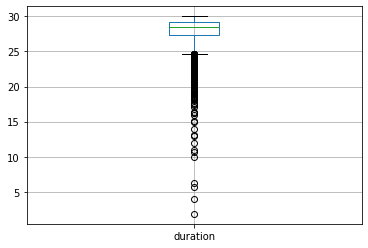

In [93]:
vad_df.boxplot('duration')

Now we gotta snip-snip the segments for each record and put them in a new dataset. We're gonna have to match these back to the original records eventually, so let's double check that the `file_name` column will serve as a unique identifier.

In [134]:
len(vad_df['file_name'].unique()), len(vad_df)

(5318, 5318)

Cool, that will work then. Commence snipification.

In [198]:
snippet_dir='/Users/markjos/projects/malachor5/data/tira-code-mixed-snippets'
snippet_clips='/Users/markjos/projects/malachor5/data/tira-code-mixed-snippets/clips'

def make_clips_for_record(row):
    clip=row['file_name']
    clip_fullpath=os.path.join('../data/tira-code-mixed', clip)
    record_start=row['60s_start']
    timestamps = row['timestamps']
    snippet_paths=[]
    for timestamp in timestamps:
        start=(timestamp[0]*1_000)-record_start
        end=(timestamp[-1]*1_000)-record_start

        wav, _= librosa.load(clip_fullpath, sr=16_000, mono=True)

        snippet_paths.append(clip_segment(
            wav=wav,
            start_ms=start,
            end_ms=end,
            wav_basename=clip,
            target_dir=snippet_dir,
        ))
    record_df = pd.DataFrame({
        'file_name': snippet_paths,
        'start': [t[0] for t in timestamps],
        'end': [t[-1] for t in timestamps],
    })
    for col, val in row.items():
        if type(val) is list:
            continue
        record_df['mother_'+col]=val
    
    return record_df

make_clips_for_record(vad_df.iloc[0])

,file_name,start,end,mother_old_start,mother_old_end,mother_transcription,mother_eaf_source,mother_wav_source,mother_raw_transcription,mother_clip,...,mother_overlap,mother_num_overlap,mother_overlap_split,mother_start_list,mother_end_list,mother_trans_list,mother_pairwise_cos_sim,mother_60s_start,mother_60s_end,mother_file_name
0,/Users/markjos/projects/malachor5/data/tira-co...,195.193,196.475,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...
1,/Users/markjos/projects/malachor5/data/tira-co...,198.584,199.614,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...
2,/Users/markjos/projects/malachor5/data/tira-co...,200.559,204.170,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...
3,/Users/markjos/projects/malachor5/data/tira-co...,204.440,205.807,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...
4,/Users/markjos/projects/malachor5/data/tira-co...,207.275,208.777,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...
5,/Users/markjos/projects/malachor5/data/tira-co...,209.705,211.561,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...
6,/Users/markjos/projects/malachor5/data/tira-co...,212.034,212.354,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,...,"[0, 1]",2,"['train', 'train']","[217011.0, 221371.0]","[219552.0, 225023.0]","['àprí jɜ̀dí ðáŋàlà', 'àprí jɜ̀dí ðá...",0.659426,187011,249552,clips/train/HH01082021-m03s07ms011-m04s09ms552...
7,/Users/markjos/projects/malachor5/data/tira-co...,212.675,215.173,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021

In [199]:
record_dfs=vad_df.progress_apply(make_clips_for_record, axis=1)


  0%|          | 0/5318 [00:00<?, ?it/s]

100%|██████████| 5318/5318 [04:03<00:00, 21.85it/s]


In [200]:
snippet_df=pd.concat(record_dfs.tolist())
snippet_df.shape

(53209, 42)

In [201]:
snippet_df['file_name']=snippet_df['file_name'].apply(lambda p: os.path.relpath(p, '/Users/markjos/projects/malachor5/data/tira-code-mixed-snippets/'))

In [202]:
snippet_metadata='/Users/markjos/projects/malachor5/data/tira-code-mixed-snippets/metadata.csv'
snippet_df.to_csv(snippet_metadata, index=False)

In [162]:
from datasets import load_dataset, load_from_disk

In [203]:
ds=load_dataset('audiofolder', data_dir=snippet_dir)
ds

Resolving data files: 100%|██████████| 4769/4769 [00:00<00:00, 45207.17it/s]
Extracting data files: 0it [00:00, ?it/s]
Extracting data files: 0it [00:00, ?it/s]
Extracting data files: 0it [00:00, ?it/s]
Generating train split: 43719 examples [00:17, 2562.07 examples/s]
Generating validation split: 4721 examples [00:04, 1021.81 examples/s]
Generating test split: 4769 examples [00:04, 1059.82 examples/s]


DatasetDict({
    train: Dataset({
        features: ['audio', 'start', 'end', 'mother_old_start', 'mother_old_end', 'mother_transcription', 'mother_eaf_source', 'mother_wav_source', 'mother_raw_transcription', 'mother_clip', 'mother_wav_rawpath', 'mother_path', 'mother_allosaurus', 'mother_clap_ipa_cos_sim', 'mother_wada_snr', 'mother_nist_stnr', 'mother_speaker-diarization-3.1', 'mother_voice-activity-detection', 'mother_whisper-large-v3', 'mother_clapipa-transcription-allosaurus', 'mother_vad_s', 'mother_drz_s', 'mother_trans_len', 'mother_pcnt_speech', 'mother_trans_len_sq', 'mother_trans_len_log', 'mother_cos_sim_softmax', 'mother_cos_sim_log', 'mother_duration', 'mother_split', 'mother_start', 'mother_end', 'mother_overlap', 'mother_num_overlap', 'mother_overlap_split', 'mother_start_list', 'mother_end_list', 'mother_trans_list', 'mother_pairwise_cos_sim', 'mother_60s_start', 'mother_60s_end', 'mother_file_name'],
        num_rows: 43719
    })
    validation: Dataset({
        f

In [204]:
train_path='/Users/markjos/projects/malachor5/data/pyarrow-datasets/tira-code-mixed-snippets-train'
ds['train'].save_to_disk(train_path)

Saving the dataset (5/5 shards): 100%|██████████| 43719/43719 [00:25<00:00, 1747.82 examples/s]


In [176]:
ds_train=load_from_disk(train_path)

In [181]:
ds['test'][500]

{'audio': {'path': '/Users/markjos/projects/malachor5/data/tira-code-mixed-snippets/clips/test/HH07242020-Zoom2-m04s50ms022-m05s50ms844-m04s57ms360-m04s58ms119.wav',
  'array': array([], dtype=float64),
  'sampling_rate': 16000},
 'start': 297.36,
 'end': 298.119,
 'mother_old_start': 320022,
 'mother_old_end': 320844,
 'mother_transcription': 'ɛ́ɾɔ̀ðɔ̀',
 'mother_eaf_source': '/Users/markjos/Library/CloudStorage/GoogleDrive-mjsimmons@ucsd.edu/Shared drives/Tira/Recordings/2020-07-24-Tira/HH07242020-Zoom2.eaf',
 'mother_wav_source': '/Users/markjos/Library/CloudStorage/GoogleDrive-mjsimmons@ucsd.edu/Shared drives/Tira/Recordings/2020-07-24-Tira/HH07242020-Zoom2.wav',
 'mother_raw_transcription': 'ɛ́ːɾɔ̀ðɔ̀',
 'mother_clip': 'data/tira-asr/clips/HH07242020-Zoom2-m05s20ms022-m05s20ms844.wav',
 'mother_wav_rawpath': '/Users/markjos/Library/CloudStorage/GoogleDrive-mjsimmons@ucsd.edu/Shared drives/Tira/Recordings/07242020-Tira/HH07242020-Zoom2.wav',
 'mother_path': 'HH07242020-Zoom2-m04s50

In [177]:
f=io.StringIO()
ds.map(lambda r: validate_clipfile(f, r['audio']['path'], wav_obj=r['audio']['array']))
f.read()

Map: 100%|██████████| 4769/4769 [00:03<00:00, 1388.11 examples/s]


''

In [213]:
snippet_df['duration']=snippet_df['end']-snippet_df['start']

print('train')
print(snippet_df[snippet_df['mother_split']=='train'].shape[0], snippet_df.loc[snippet_df['mother_split']=='train', 'duration'].sum()/3_600)

print('validation')
print(snippet_df[snippet_df['mother_split']=='validation'].shape[0], snippet_df.loc[snippet_df['mother_split']=='validation', 'duration'].sum()/3_600)

print('test')
print(snippet_df[snippet_df['mother_split']=='test'].shape[0], snippet_df.loc[snippet_df['mother_split']=='test', 'duration'].sum()/3_600)

train
43719 18.470685277777797
validation
4721 1.9533944444444504
test
4769 1.9545952777777789


In [216]:
vad_df['duration']=vad_df['end']-vad_df['start']

print('train')
print(vad_df[vad_df['split']=='train'].shape[0], vad_df.loc[vad_df['split']=='train', 'duration'].sum()/3_600)

print('validation')
print(vad_df[vad_df['split']=='validation'].shape[0], vad_df.loc[vad_df['split']=='validation', 'duration'].sum()/3_600)

print('test')
print(vad_df[vad_df['split']=='test'].shape[0], vad_df.loc[vad_df['split']=='test', 'duration'].sum()/3_600)

train
4421 34.27652861111113
validation
470 3.658173333333336
test
427 3.3736352777777796
